# ARIMA Forecasting

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [2]:
dividend_files = os.listdir('./data/series/good')

In [3]:
file = dividend_files[1]

In [4]:
company = file.split('_')[0]

In [5]:
df = pd.read_csv("./data/series/good/" + file)
df.rename(columns = {'0': 'Dividends'}, inplace = True)
df.head(5)

,Date,Dividends
0,1984-10-09,0.0205
1,1984-10-09,0.0205
2,1984-10-09,0.0205
3,1984-10-09,0.0205
4,1985-01-10,0.0215


In [6]:
dividends = df['Dividends']

Text(0.5, 1.0, 'ABM - Dividends')

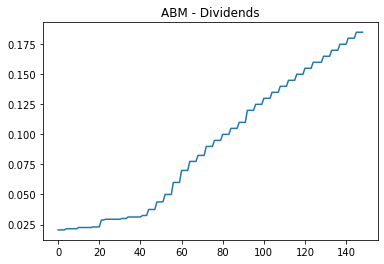

In [7]:
plt.plot(dividends)
plt.title(f'{company} - Dividends')

Text(0.5, 1.0, 'ABM Dividends - Autocorrelation plot with lag = 1')

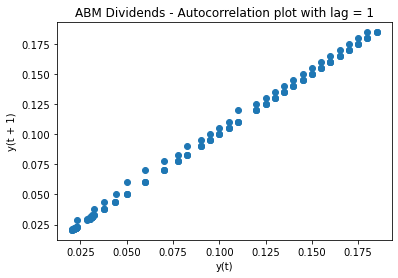

In [8]:
plt.figure()
lag_plot(dividends, lag=1)
plt.title(f'{company} Dividends - Autocorrelation plot with lag = 1')

The p-value should be less than 0.5 for the data to be stationary.

In [9]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [10]:
perform_adf_test(dividends)

ADF Statistic: 0.649370
p-value: 0.988771


In [11]:
diff_dividends = dividends.diff(1).dropna()

In [12]:
perform_adf_test(diff_dividends)

ADF Statistic: -3.096103
p-value: 0.026843


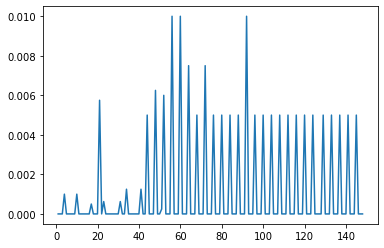

In [13]:
plt.plot(diff_dividends)

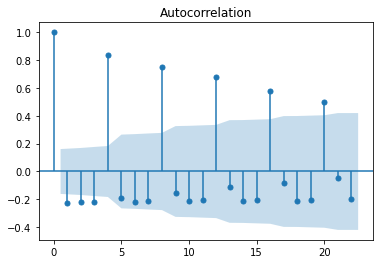

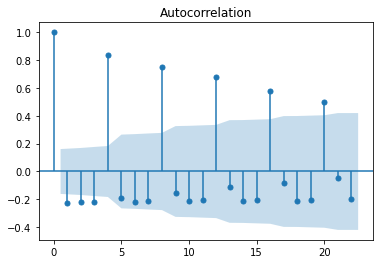

In [14]:
plot_acf(diff_dividends)

In [15]:
# ARIMA
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]    # split train and test data
training_data = train_data['Dividends'].values   
test_data = test_data['Dividends'].values
history = [x for x in training_data]    # make list of training data
model_predictions = []

for time_point in range(len(test_data)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()    # fit model
    output = model_fit.forecast()    # get out-of-sample forecasts (predictions)
    yhat = output[0]    # get value from array
    model_predictions.append(yhat)    # list of model predictions
    true_test_value = test_data[time_point]    # get true value
    history.append(true_test_value)    # append to history (training data)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print(f'Testing Mean Squared Error - {MSE_error:.5f}')

C:\Users\timjr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\timjr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\timjr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\timjr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\timjr\anaconda3\lib\site-packages\statsmodels\base\model

Testing Mean Squared Error - 0.00001


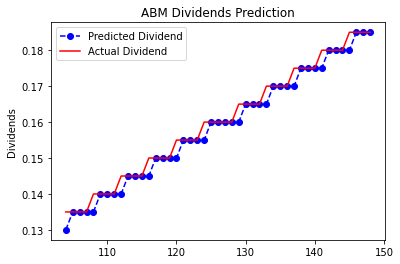

In [16]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Dividend')
plt.plot(test_set_range, test_data, color='red', label='Actual Dividend')
plt.title(f'{company} Dividends Prediction')
#plt.xlabel('Date')
plt.ylabel('Dividends')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()